In [7]:
import os
from os.path import exists
import numpy as np
import pandas as pd
import warnings

from rolestereotype import RoleStereotype as rs
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
sns.set_style(style='white')
%matplotlib inline

In [3]:
data = pd.read_excel('../../results/xls/designsmells-sweethome3d-5.6.xlsx')
data.drop(columns="Unnamed: 0", inplace=True)
data.head()

,Class,Role Stereotype,DsTotal,Imperative Abstraction,Multifaceted Abstraction,Unnecessary Abstraction,Unutilized Abstraction,Feature Envy,Deficient Encapsulation,Unexploited Encapsulation,...,Cyclically-dependent Modularization,Hub-like Modularization,Insufficient Modularization,Broken Hierarchy,Cyclic Hierarchy,Deep Hierarchy,Missing Hierarchy,Multipath Hierarchy,Rebellious Hierarchy,Wide Hierarchy
0,com.eteks.sweethome3d.applet.AppletApplication,Interfacer,2,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,com.eteks.sweethome3d.applet.AppletApplication...,Service Provider,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,com.eteks.sweethome3d.applet.AppletApplication...,Service Provider,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,com.eteks.sweethome3d.applet.AppletContentManager,NaN,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,com.eteks.sweethome3d.applet.AppletUserPrefere...,Structurer,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [9]:
ds = "Imperative Abstraction,Multifaceted Abstraction,Unnecessary Abstraction,Unutilized Abstraction,Feature Envy,Deficient Encapsulation,Unexploited Encapsulation,Broken Modularization,Cyclically-dependent Modularization,Hub-like Modularization,Insufficient Modularization,Broken Hierarchy,Cyclic Hierarchy,Deep Hierarchy,Missing Hierarchy,Multipath Hierarchy,Rebellious Hierarchy,Wide Hierarchy".split(",")
mt = "cbo,cboModified,fanin,fanout,wmc,dit,noc,rfc,lcom*,tcc,lcc,totalMethodsQty,publicMethodsQty,privateMethodsQty,abstractMethodsQty,finalMethodsQty,totalFieldsQty,publicFieldsQty,privateFieldsQty,finalFieldsQty,nosi,loc,returnQty,loopQty,comparisonsQty,tryCatchQty,parenthesizedExpsQty,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty".split(',')

In [10]:
rstr = [str(r) for r in rs]

In [11]:
data[ds] = data[ds].replace([np.nan, 'NaN'], 0)
data[ds] = data[ds].astype(int)
data['DsTotal'] = data['DsTotal'].astype(int)
data.head()

,Class,Role Stereotype,DsTotal,Imperative Abstraction,Multifaceted Abstraction,Unnecessary Abstraction,Unutilized Abstraction,Feature Envy,Deficient Encapsulation,Unexploited Encapsulation,...,Cyclically-dependent Modularization,Hub-like Modularization,Insufficient Modularization,Broken Hierarchy,Cyclic Hierarchy,Deep Hierarchy,Missing Hierarchy,Multipath Hierarchy,Rebellious Hierarchy,Wide Hierarchy
0,com.eteks.sweethome3d.applet.AppletApplication,Interfacer,2,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,com.eteks.sweethome3d.applet.AppletApplication...,Service Provider,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,com.eteks.sweethome3d.applet.AppletApplication...,Service Provider,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,com.eteks.sweethome3d.applet.AppletContentManager,NaN,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,com.eteks.sweethome3d.applet.AppletUserPrefere...,Structurer,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
data[ds].describe()

,Imperative Abstraction,Multifaceted Abstraction,Unnecessary Abstraction,Unutilized Abstraction,Feature Envy,Deficient Encapsulation,Unexploited Encapsulation,Broken Modularization,Cyclically-dependent Modularization,Hub-like Modularization,Insufficient Modularization,Broken Hierarchy,Cyclic Hierarchy,Deep Hierarchy,Missing Hierarchy,Multipath Hierarchy,Rebellious Hierarchy,Wide Hierarchy
count,355.000000,355.0,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.0,355.0,355.000000,355.000000,355.000000,355.000000
mean,0.005634,0.0,0.245070,0.481690,0.228169,0.067606,0.101408,0.002817,0.030986,0.008451,0.242254,0.169014,0.0,0.0,0.109859,0.011268,0.025352,0.011268
std,0.074953,0.0,0.462366,0.533168,1.456059,0.251422,0.302295,0.053074,0.173524,0.091668,0.429052,0.375293,0.0,0.0,0.313155,0.105698,0.157414,0.105698
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,3.000000,3.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [13]:
data[ds].sum().sort_values(ascending=False)

Unutilized Abstraction                 171
Unnecessary Abstraction                 87
Insufficient Modularization             86
Feature Envy                            81
Broken Hierarchy                        60
Missing Hierarchy                       39
Unexploited Encapsulation               36
Deficient Encapsulation                 24
Cyclically-dependent Modularization     11
Rebellious Hierarchy                     9
Wide Hierarchy                           4
Multipath Hierarchy                      4
Hub-like Modularization                  3
Imperative Abstraction                   2
Broken Modularization                    1
Deep Hierarchy                           0
Cyclic Hierarchy                         0
Multifaceted Abstraction                 0
dtype: int64

In [15]:
metric = pd.read_excel('../../results/xls/metrics-sweethome3d-5.6.xlsx')
metric.head()

,class,type,cbo,cboModified,fanin,fanout,wmc,dit,noc,rfc,...,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty,modifiers,logStatementsQty
0,com.eteks.sweethome3d.swing.BackgroundImageWiz...,anonymous,0,0,0,0,1,1,0,5,...,0,6,0,0,0,0,0,4,-1,0
1,com.eteks.sweethome3d.swing.ImportedFurnitureW...,anonymous,2,2,0,2,3,1,0,8,...,5,2,3,0,0,0,0,18,-1,0
2,com.eteks.sweethome3d.swing.BackgroundImageWiz...,anonymous,3,3,0,3,2,1,0,14,...,0,0,0,1,0,0,0,9,-1,0
3,com.eteks.sweethome3d.swing.ImportedFurnitureW...,anonymous,2,2,0,2,3,1,0,8,...,5,2,3,0,0,0,0,18,-1,0
4,com.eteks.sweethome3d.viewcontroller.HomeContr...,anonymous,3,3,0,3,2,1,0,2,...,0,0,0,0,0,0,0,10,-1,0


In [16]:
metric[mt].sum().sort_values(ascending=False)

loc                     117409.000000
uniqueWordsQty           63147.000000
rfc                      22049.000000
wmc                      20718.000000
numbersQty               17766.000000
assignmentsQty           16914.000000
variablesQty             13307.000000
cboModified              11034.000000
totalMethodsQty           7627.000000
stringLiteralsQty         6782.000000
cbo                       6459.000000
fanout                    6459.000000
mathOperationsQty         5798.000000
publicMethodsQty          5776.000000
comparisonsQty            5656.000000
nosi                      4707.000000
fanin                     4575.000000
returnQty                 3728.000000
totalFieldsQty            3475.000000
privateFieldsQty          3409.000000
dit                       2850.000000
parenthesizedExpsQty      2131.000000
maxNestedBlocksQty        1745.000000
loopQty                   1478.000000
privateMethodsQty         1449.000000
finalFieldsQty            1415.000000
anonymousCla

In [17]:
merged_df = pd.merge(data, metric, left_on= "Class", right_on='class',how= "inner")
merged_df['project'] = 'SweetHome3d-5.6'


In [18]:
# merged_df.to_excel(f'../../results/xls/role-smell-metric-sweethome3d.xlsx')
# merged_df.to_csv(f'../../results/xls/role-smell-metric-sweethome3d.csv')

In [20]:
# pearson metrics correlations
# controllers and coordinators only

sub_df = merged_df.loc[merged_df['Role Stereotype'].isin(['Controller','Coordinator'])]

In [22]:
sub_df = sub_df[mt]
sub_df.head()

,cbo,cboModified,fanin,fanout,wmc,dit,noc,rfc,lcom*,tcc,...,stringLiteralsQty,numbersQty,assignmentsQty,mathOperationsQty,variablesQty,maxNestedBlocksQty,anonymousClassesQty,innerClassesQty,lambdasQty,uniqueWordsQty
5,16,26,10,16,18,3,0,17,0.783217,0.254545,...,6,6,20,2,20,1,10,0,0,113
9,11,22,11,11,6,1,0,2,0.464286,0.500000,...,0,0,7,0,7,1,0,0,0,31
17,2,3,1,2,21,1,0,25,0.000000,NaN,...,115,10,12,11,12,3,0,0,0,97
19,8,15,7,8,75,1,0,70,0.843750,0.190476,...,21,22,81,7,67,6,0,1,0,131
34,55,58,3,55,265,2,0,285,0.899346,0.515151,...,428,27,166,9,151,7,0,1,0,391


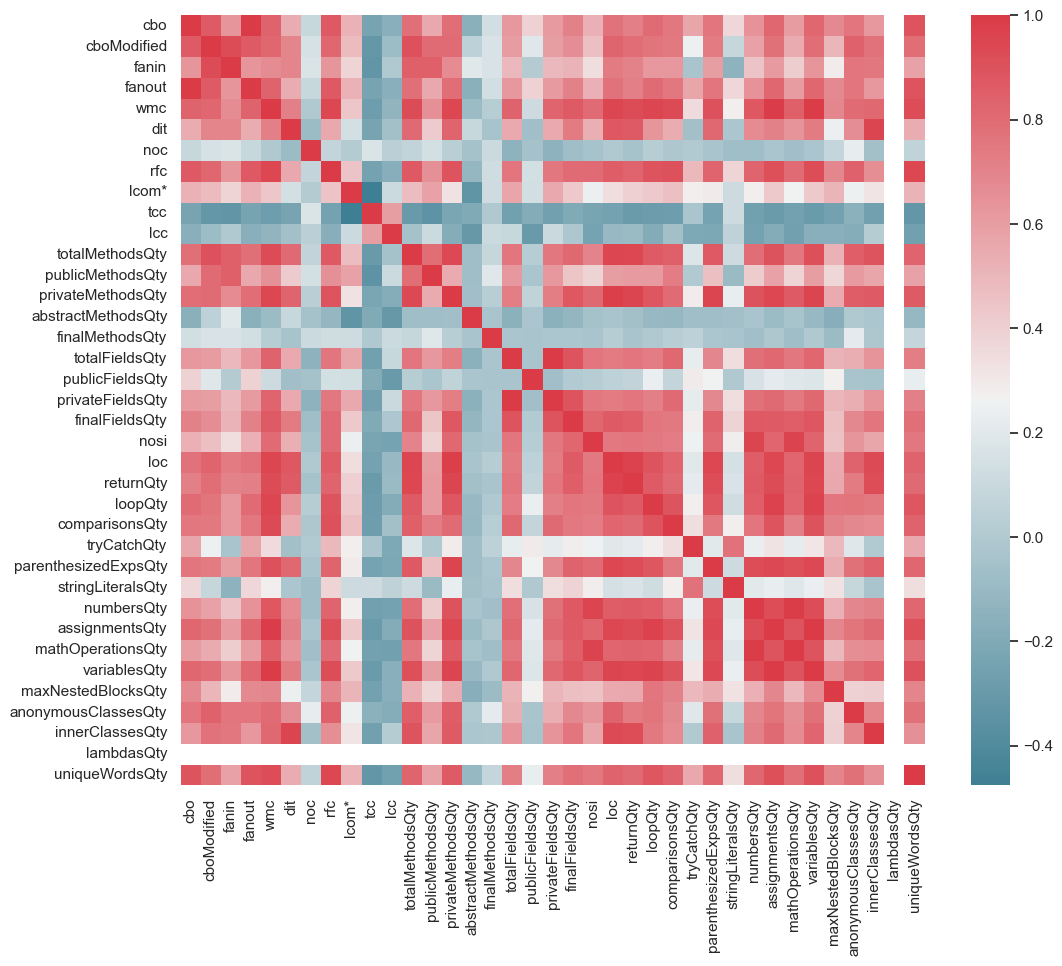

In [47]:
# Using Pearson Correlation
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(12,10))
cor = sub_df.corr()
sns.heatmap(cor, annot=False, cmap=cmap)
plt.show()

In [55]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [58]:
print(f'{len(correlation(sub_df, 0.95))}: {correlation(sub_df, 0.95)}')


11: {'parenthesizedExpsQty', 'innerClassesQty', 'assignmentsQty', 'numbersQty', 'loc', 'privateFieldsQty', 'variablesQty', 'returnQty', 'loopQty', 'mathOperationsQty', 'fanout'}


In [59]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation_pairs(dataset, threshold):
    col_corr = dict() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                corr_value = corr_matrix.iloc[i, j]
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j] # getting the name of column
                col_corr.update([(corr_value, [col_i, col_j])])
    return col_corr

In [60]:
correlation_pairs(sub_df, 0.95)

{1.0: ['fanout', 'cbo'],
 0.9996780205895469: ['privateFieldsQty', 'totalFieldsQty'],
 0.951381274157334: ['loc', 'wmc'],
 0.9525140761659923: ['loc', 'totalMethodsQty'],
 0.978503002621945: ['loc', 'privateMethodsQty'],
 0.9573208046162219: ['returnQty', 'privateMethodsQty'],
 0.9694880030873079: ['returnQty', 'loc'],
 0.9531624138526623: ['loopQty', 'wmc'],
 0.9546191703170005: ['parenthesizedExpsQty', 'privateMethodsQty'],
 0.9542484760427524: ['numbersQty', 'nosi'],
 0.9855167523802246: ['assignmentsQty', 'wmc'],
 0.9681807418947737: ['assignmentsQty', 'loopQty'],
 0.9619880550810973: ['mathOperationsQty', 'nosi'],
 0.9940454931087183: ['mathOperationsQty', 'numbersQty'],
 0.9888484276232077: ['variablesQty', 'wmc'],
 0.9563495524646765: ['variablesQty', 'privateMethodsQty'],
 0.9552582818112568: ['variablesQty', 'loc'],
 0.9599379989858327: ['variablesQty', 'loopQty'],
 0.9975274580372946: ['variablesQty', 'assignmentsQty'],
 0.9577360532495609: ['innerClassesQty', 'dit']}